In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [86]:
df_registrations_all = pd.read_csv('/content/gdrive/MyDrive/Projects/Feynn Labs AI/Project2/Copy of vahan-vehicle-registrations-by-fuel-type.csv')
df_owners = pd.read_csv('/content/gdrive/MyDrive/Projects/Feynn Labs AI/Project2/ev_owners_data.csv')
df_charging = pd.read_csv('/content/gdrive/MyDrive/Projects/Feynn Labs AI/Project2/ev-charging-stations-india.csv')

In [87]:
df_owners.head()

,Age,Income (INR)
0,36-45,86835.119516
1,56-65,131275.758463
2,46-55,123760.595955
3,36-45,68461.926887
4,25-35,46523.779930


In [121]:
df_registrations_all.head()

,id,date,state_name,state_code,office_name,office_code,type,category,registrations
0,0,2019-04-01,Andaman & Nicobar Island,35,Port Blair Dto,AN1,Diesel,Fuel,86.0
1,1,2019-04-01,Andaman & Nicobar Island,35,Port Blair Dto,AN1,Petrol,Fuel,667.0
2,2,2019-08-01,Andaman & Nicobar Island,35,Port Blair Dto,AN1,Diesel,Fuel,53.0
3,3,2019-08-01,Andaman & Nicobar Island,35,Port Blair Dto,AN1,Not Applicable,Fuel,10.0
4,4,2019-08-01,Andaman & Nicobar Island,35,Port Blair Dto,AN1,Petrol,Fuel,654.0


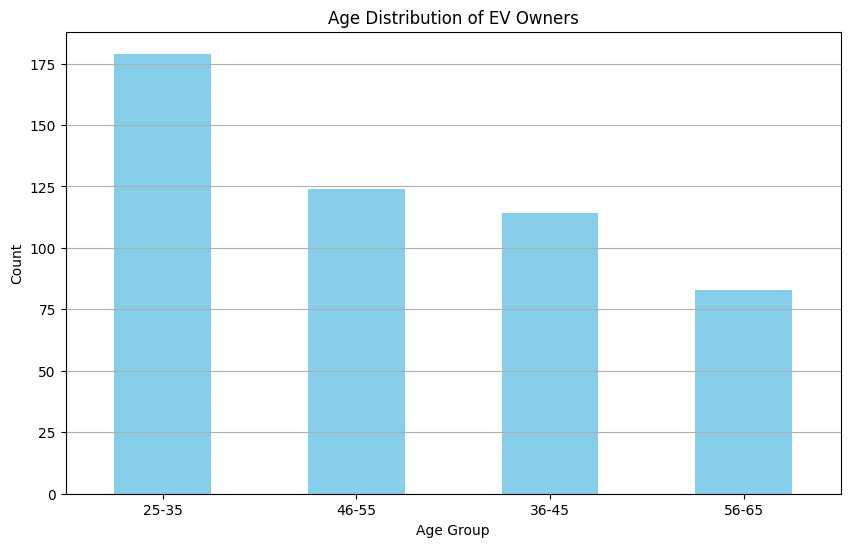

In [89]:
plt.figure(figsize=(10, 6))
df_owners['Age'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Age Distribution of EV Owners')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

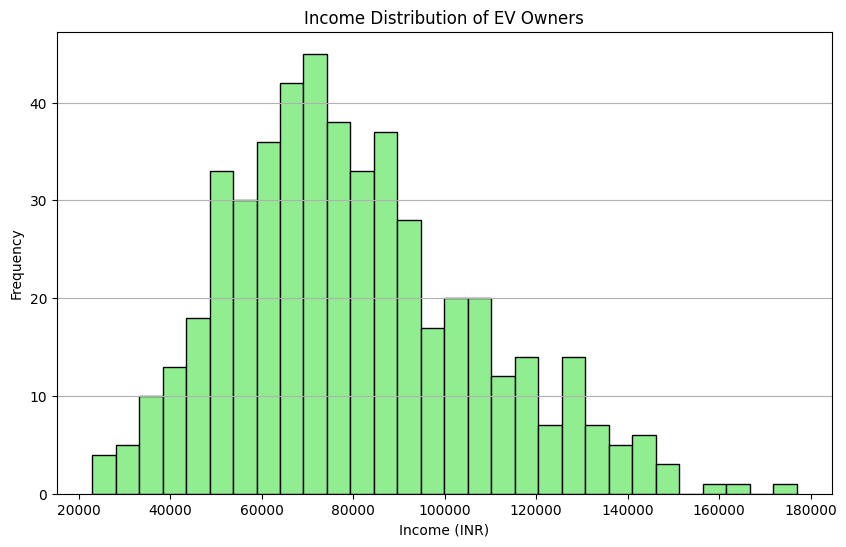

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(df_owners['Income (INR)'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Income Distribution of EV Owners')
plt.xlabel('Income (INR)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [91]:
df_owners['Income (INR)'] = pd.to_numeric(df_owners['Income (INR)'], errors='coerce')

In [92]:
age_mapping = {'25-35': 1, '36-45': 2, '46-55': 3, '56-65': 4}
df_owners['Age_numeric'] = df_owners['Age'].map(age_mapping)

In [93]:
df_owners.head()

,Age,Income (INR),Age_numeric
0,36-45,86835.119516,2
1,56-65,131275.758463,4
2,46-55,123760.595955,3
3,36-45,68461.926887,2
4,25-35,46523.779930,1


In [94]:
X = df_owners[['Age_numeric', 'Income (INR)']]

In [95]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_owners['Segment'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


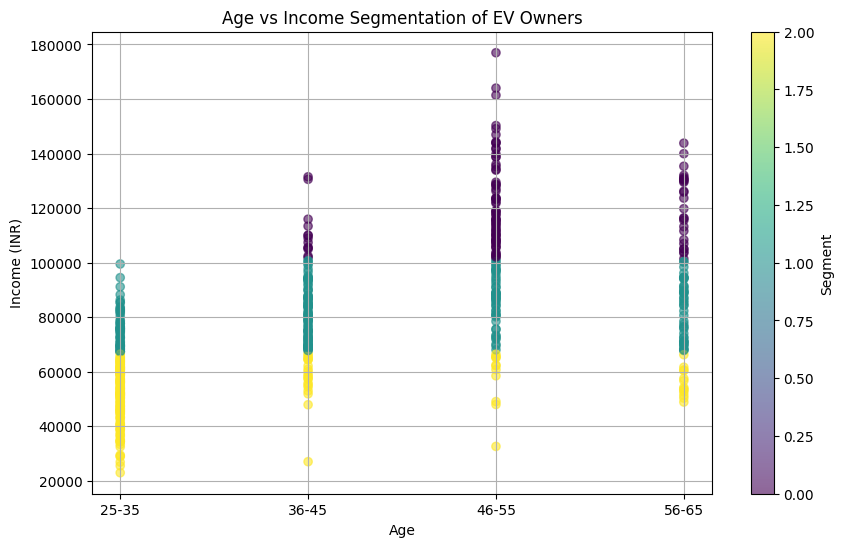

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(df_owners['Age_numeric'], df_owners['Income (INR)'], c=df_owners['Segment'], cmap='viridis', alpha=0.6)
plt.title('Age vs Income Segmentation of EV Owners')
plt.xlabel('Age')
plt.ylabel('Income (INR)')
plt.colorbar(label='Segment')
plt.xticks(np.arange(1, 5), list(age_mapping.keys()))  # Set x-axis ticks to original age ranges
plt.grid(True)
plt.show()

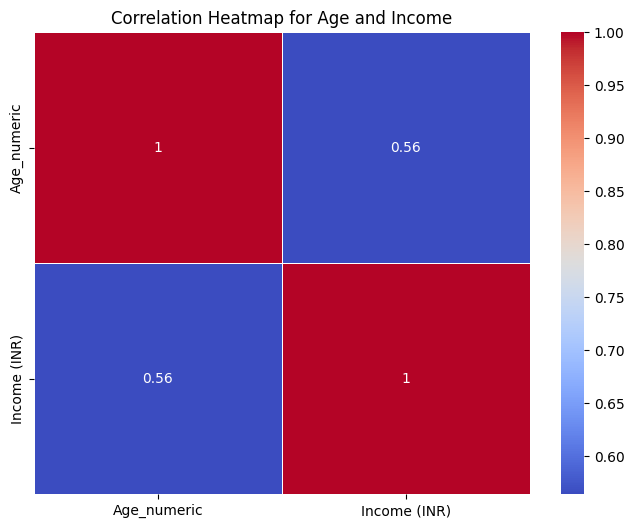

In [149]:
plt.figure(figsize=(8, 6))
correlation = df_owners[['Age_numeric', 'Income (INR)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Age and Income')
plt.show()

In [97]:
df_registrations_all.head()

,id,date,state_name,state_code,office_name,office_code,type,category,registrations
0,0,2019-04-01,Andaman & Nicobar Island,35,Port Blair Dto,AN1,Diesel,Fuel,86.0
1,1,2019-04-01,Andaman & Nicobar Island,35,Port Blair Dto,AN1,Petrol,Fuel,667.0
2,2,2019-08-01,Andaman & Nicobar Island,35,Port Blair Dto,AN1,Diesel,Fuel,53.0
3,3,2019-08-01,Andaman & Nicobar Island,35,Port Blair Dto,AN1,Not Applicable,Fuel,10.0
4,4,2019-08-01,Andaman & Nicobar Island,35,Port Blair Dto,AN1,Petrol,Fuel,654.0


In [98]:
df_registrations_all = df_registrations_all.dropna()

In [99]:
df_registrations = df_registrations_all[df_registrations_all['type'] == 'Electric(Bov)']

In [100]:
df_registrations.isnull().sum()

id               0
date             0
state_name       0
state_code       0
office_name      0
office_code      0
type             0
category         0
registrations    0
dtype: int64

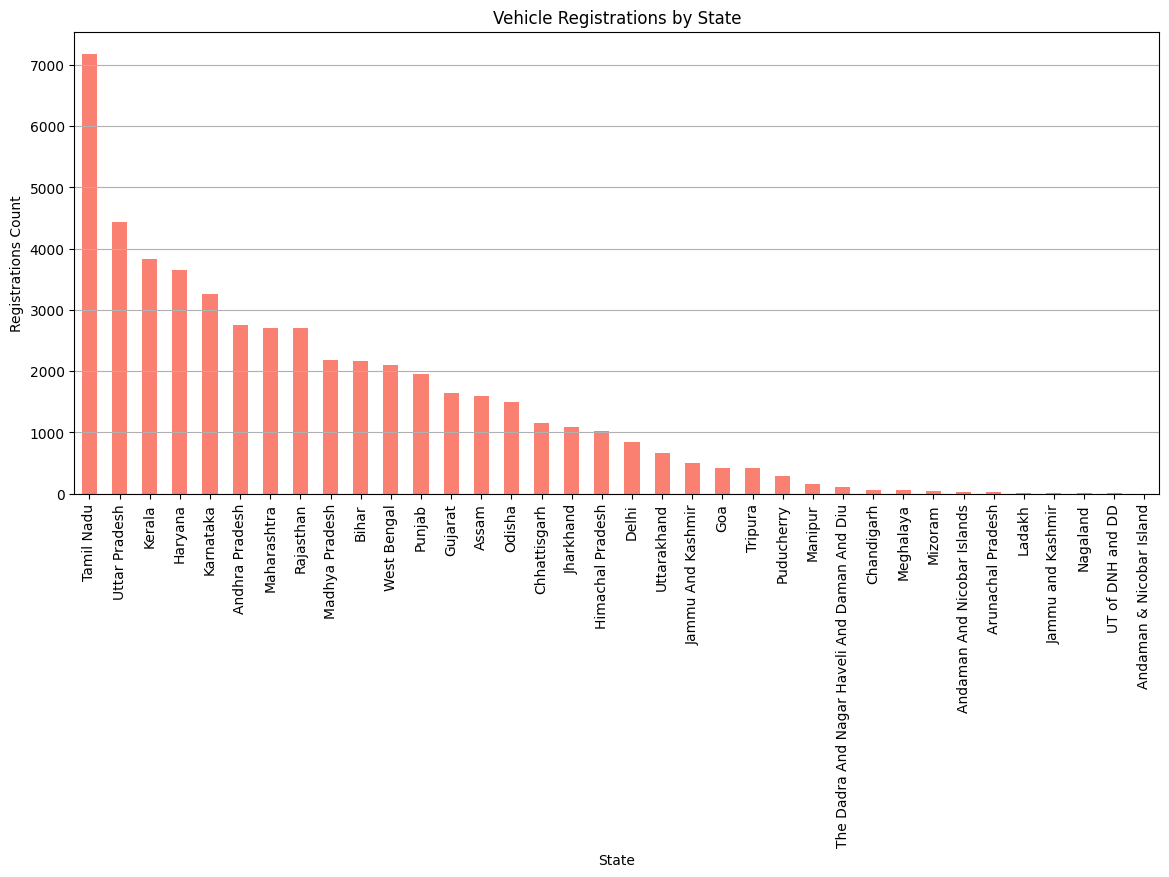

In [111]:
state_counts = df_registrations['state_name'].value_counts()

# Visualization state-wise registrations
plt.figure(figsize=(14, 6))
state_counts.plot(kind='bar', color='salmon')
plt.title('Vehicle Registrations by State')
plt.xlabel('State')
plt.ylabel('Registrations Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [102]:
vehicle_type_counts = df_registrations_all['type'].value_counts()

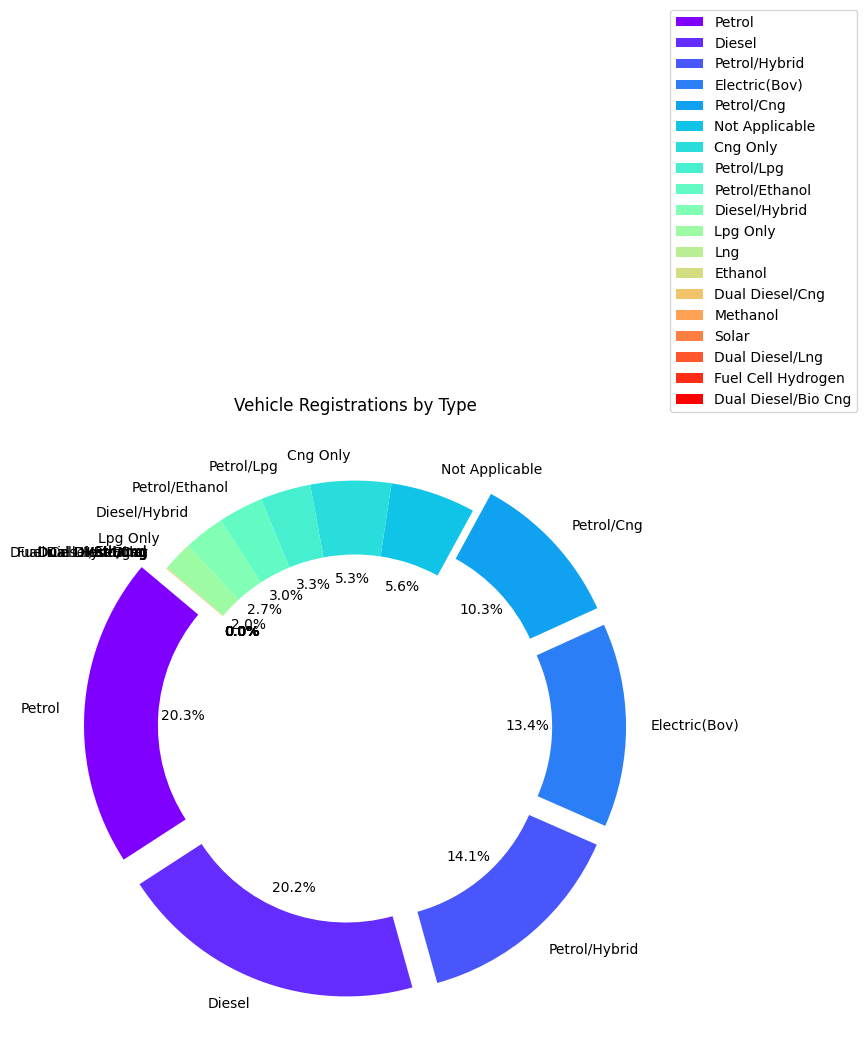

In [103]:
vehicle_type_counts = df_registrations_all['type'].value_counts()

#explode array to separate the slices
explode = [0.1 if i < 5 else 0 for i in range(len(vehicle_type_counts))]


plt.figure(figsize=(12, 8))
vehicle_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='rainbow',explode=explode,wedgeprops=dict(width=0.3))
plt.title('Vehicle Registrations by Type')
plt.ylabel('')
plt.legend(loc='lower left', bbox_to_anchor=(1.0, 1.0))
plt.show()

<ipython-input-129-e91878126a17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_registrations['date'] = pd.to_datetime(df_registrations['date'])


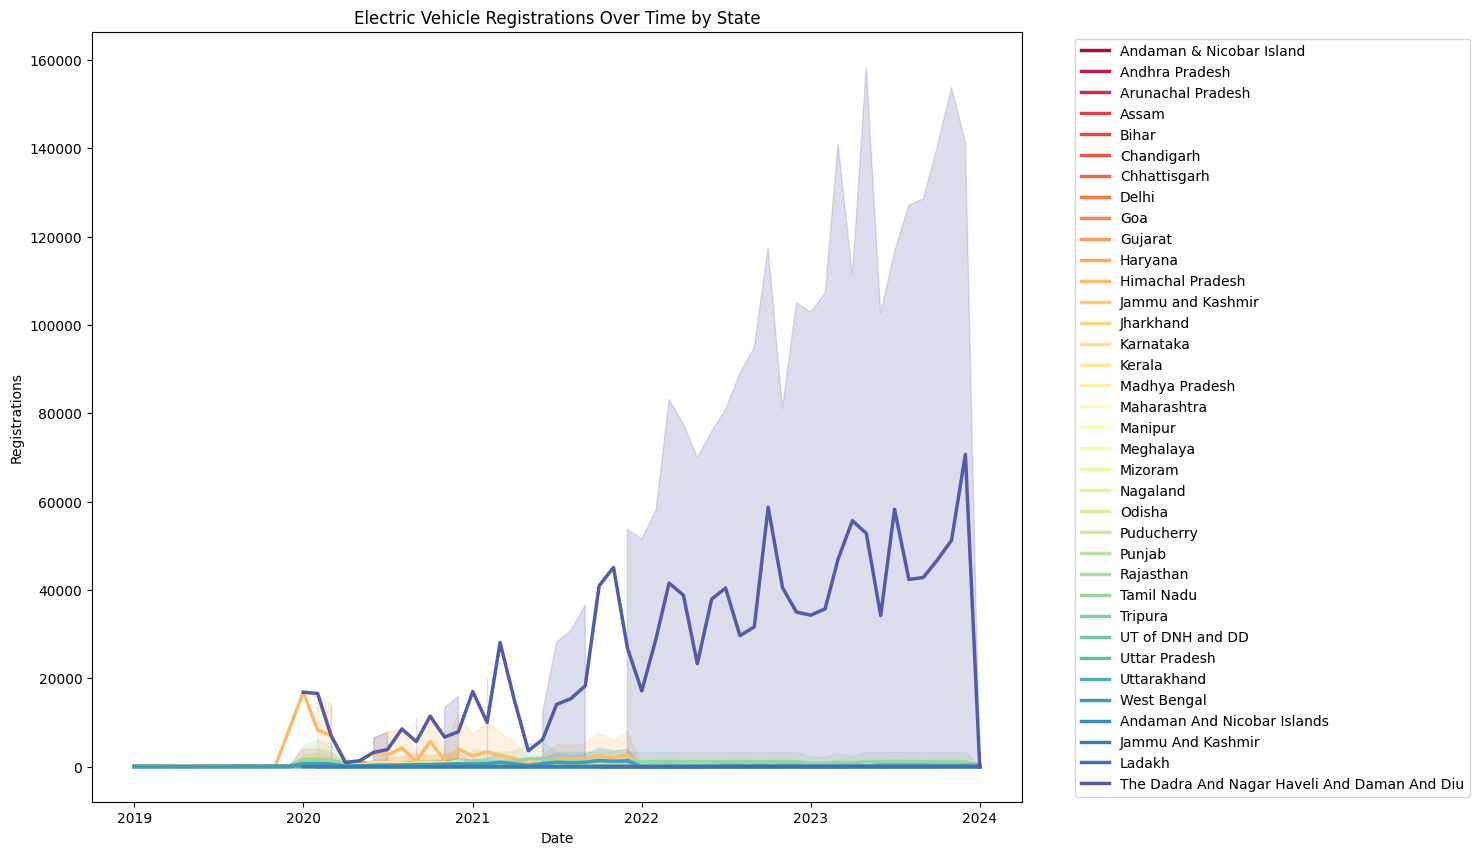

In [129]:
df_registrations['date'] = pd.to_datetime(df_registrations['date'])

plt.figure(figsize=(12, 10))
sns.lineplot(x='date', y='registrations', hue='state_name', data=df_registrations, palette='Spectral', linewidth=2.5)
plt.title('Electric Vehicle Registrations Over Time by State')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [104]:
df_charging.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [105]:
df_charging.isnull().sum()

name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

In [106]:
df_charging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [107]:
df_charging = df_charging.dropna()

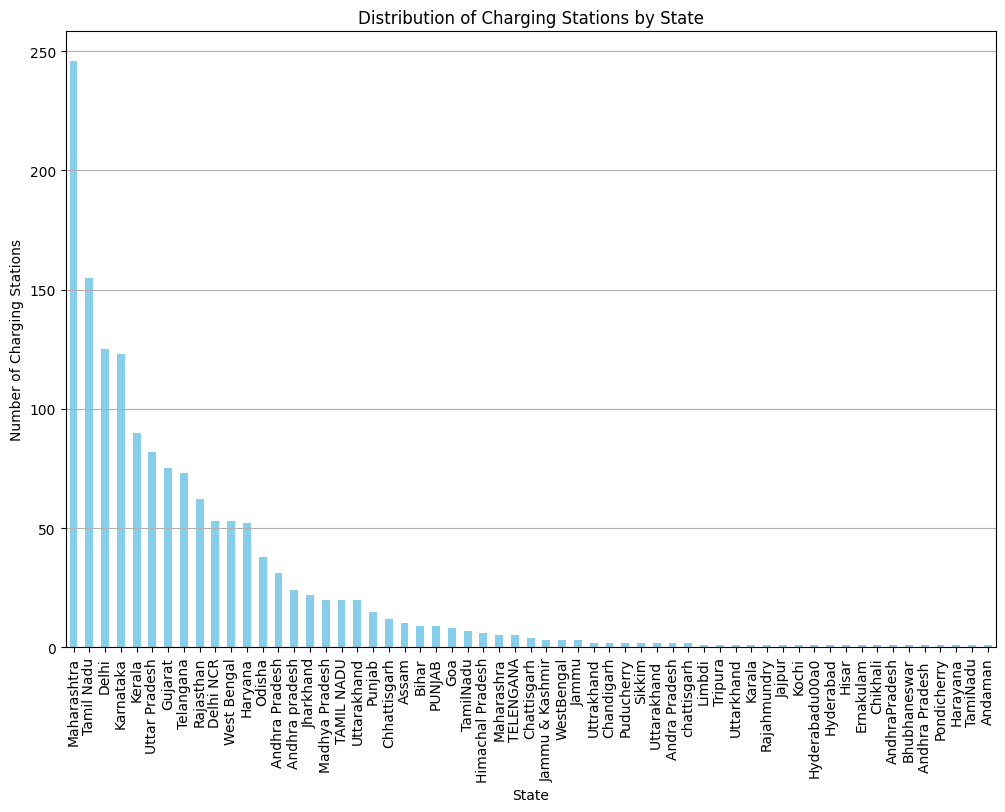

In [110]:
charging_station_counts = df_charging['state'].value_counts()

# Distribution of charging stations by state
plt.figure(figsize=(12, 8))
charging_station_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Charging Stations by State')
plt.xlabel('State')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=90)
plt.grid(axis  = 'y')
plt.show()

In [113]:
df_registrations_charging = pd.merge(df_registrations, df_charging, left_on='state_name', right_on='state', how='inner')

In [114]:
df_registrations_charging

,id,date,state_name,state_code,office_name,office_code,type_x,category,registrations,name,state,city,address,lattitude,longitude,type_y
0,31,2019-04-01,Andhra Pradesh,28,Adoni Rto,AP221,Electric(Bov),Fuel,1.0,Nukkad Tea Cafe,Andhra Pradesh,raipur,"75, Jalvihar Colony Rd, Civil Lines, Raipur, C...",21.2404762,81.657498,6.0
1,31,2019-04-01,Andhra Pradesh,28,Adoni Rto,AP221,Electric(Bov),Fuel,1.0,Hotel Parktel,Andhra Pradesh,ghaziabad,"Omaxe Plaza, 583, Vijay Laxmi Pandit Marg, Nea...",28.6463665,77.367840,6.0
2,31,2019-04-01,Andhra Pradesh,28,Adoni Rto,AP221,Electric(Bov),Fuel,1.0,Ardas Televentures Pvt Ltd,Andhra Pradesh,jaipur,"#147, Rathore Nagar, Amrapali Road, Vaishali N...",26.911545,75.748760,6.0
3,31,2019-04-01,Andhra Pradesh,28,Adoni Rto,AP221,Electric(Bov),Fuel,1.0,Abhay Graphics II,Andhra Pradesh,pune,"D-II, Plot no 32, Unit B - Near Kia Showroom, ...",18.6532425324259,73.803401,6.0
4,31,2019-04-01,Andhra Pradesh,28,Adoni Rto,AP221,Electric(Bov),Fuel,1.0,Sri Murugan Stores,Andhra Pradesh,chennai,"9&10, Tejraj colony, Agaram Main Rd, Selaiyur,...",12.9056714,80.142139,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899514,377908,2024-01-01,West Bengal,19,Uttar Dinajpur Rto,WB59,Electric(Bov),Fuel,22.0,"Hotel Artland, Old Digha Purba",West Bengal,Digha,"Old digha purba, Digha Barrister Colony Rd, be...",21.624423,87.528599,7.0
3899515,377908,2024-01-01,West Bengal,19,Uttar Dinajpur Rto,WB59,Electric(Bov),Fuel,22.0,"IOCL - PIONEER AUTO SERVICE, Bagdogara",West Bengal,Darjeeling,BAGDOGRA PO: BAGDOGRA DT: DARJEELING; West Ben...,26.7006026,88.329352,7.0
3899516,377908,2024-01-01,West Bengal,19,Uttar Dinajpur Rto,WB59,Electric(Bov),Fuel,22.0,Tata Power,West Bengal,Kolkata,"IOCL COCO Opp Nature Park, Makalhati MAuza, Ma...",22.52299,88.290810,7.0
3899517,377908,2024-01-01,West Bengal,19,Uttar Dinajpur Rto,WB59,Electric(Bov),Fuel,22.0,Tata Power,West Bengal,Durgapur,"Kejriwal Castings, Gopalpur, Kejriwal Castings...",23.498815,87.377675,7.0


In [115]:
df_registrations_charging.isnull().sum()

id               0
date             0
state_name       0
state_code       0
office_name      0
office_code      0
type_x           0
category         0
registrations    0
name             0
state            0
city             0
address          0
lattitude        0
longitude        0
type_y           0
dtype: int64

In [116]:
state_analysis = df_registrations_charging.groupby('state_name').agg({
    'registrations': 'sum',
    'name': 'count'
}).rename(columns={'name': 'charging_stations'}).reset_index()


In [117]:
state_analysis = state_analysis.sort_values(by='registrations', ascending=False)

<ipython-input-151-7cca8205cd48>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


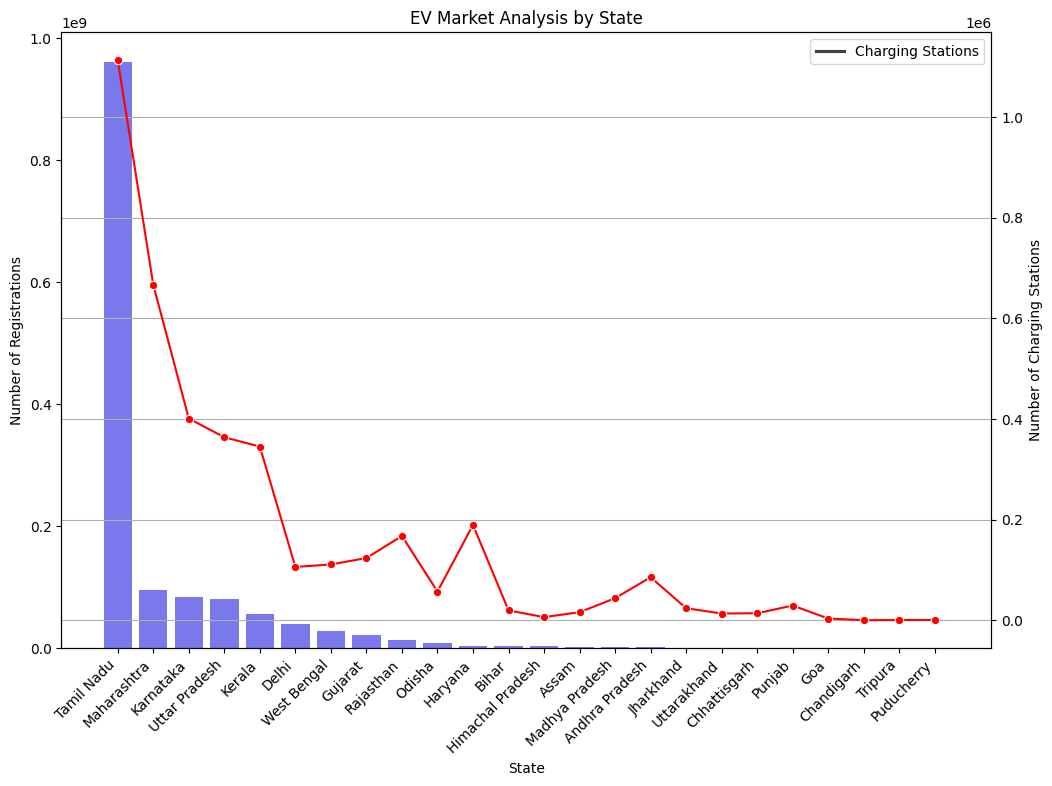

In [151]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='state_name', y='registrations', data=state_analysis, color='blue', alpha=0.6)
ax2 = ax.twinx()
sns.lineplot(x='state_name', y='charging_stations', data=state_analysis, ax=ax2, color='red', marker='o')

ax.set_xlabel('State')
ax.set_ylabel('Number of Registrations')
ax2.set_ylabel('Number of Charging Stations')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('EV Market Analysis by State')
ax.legend(['Charging Stations'], loc='upper right')
plt.grid(True)
plt.show()

In [137]:
state_registrations = df_registrations.groupby('state_name')['registrations'].sum().reset_index()

In [138]:
charging_stations_count = df_charging.groupby('state').size().reset_index(name='num_charging_stations')

In [139]:
state_correlation_data = pd.merge(state_registrations, charging_stations_count, left_on='state_name', right_on='state')

In [141]:
correlation_matrix_states = state_correlation_data[['registrations', 'num_charging_stations']].corr()

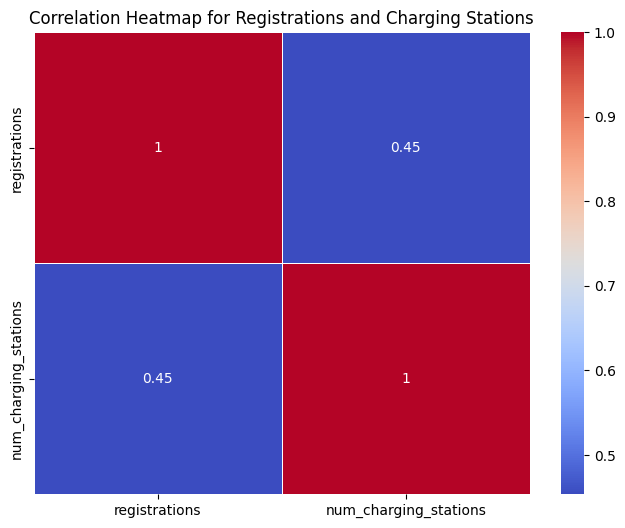

In [143]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_states, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Registrations and Charging Stations')
plt.show()